In [0]:
import pandas as pd   #to use read_csv(), crosstab()
import numpy as np    #to use exponentiation : exp()
import statsmodels.api as sm  #to use the Logit()
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [0]:
#import the dataset
traindata=pd.read_csv('credit_card_default_train.csv',sep=",")
testdata=pd.read_csv('credit_card_default_test.csv',sep=",")

In [0]:
traindata=traindata.replace(['M','F'], [1,2]) 
testdata=testdata.replace(['M','F'], [1,2]) 

In [0]:
traindata['EDUCATION_STATUS']=traindata['EDUCATION_STATUS'].replace(['Graduate','High School','Other'], [3,2,1]) 
testdata['EDUCATION_STATUS']=testdata['EDUCATION_STATUS'].replace(['Graduate','High School','Other'], [3,2,1]) 

In [0]:
traindata['MARITAL_STATUS']=traindata['MARITAL_STATUS'].replace(['Single','Other'], [1,2]) 
testdata['MARITAL_STATUS']=testdata['MARITAL_STATUS'].replace(['Single','Other'], [1,2]) 

In [0]:
traindata['AGE']=traindata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [4,3,2,1]) 
testdata['AGE']=testdata['AGE'].replace(['Less than 30','31-45','46-65','More than 65'], [4,3,2,1]) 


In [0]:
traindata['Balance_Limit_V1'] = traindata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)
testdata['Balance_Limit_V1'] = testdata['Balance_Limit_V1'].map(lambda x : float(x[0:-1])*1000 if (x[-1]=='K') else float(x[0:-1])*1000000)

In [0]:
# testdata[testdata.columns[12:24]]=testdata[testdata.columns[12:24]]/traindata.mean()[traindata.columns[12:24]]
# traindata[traindata.columns[12:24]]=traindata[traindata.columns[12:24]]/traindata.mean()[traindata.columns[12:24]]


In [0]:
# testdata['Balance_Limit_V1']=testdata['Balance_Limit_V1']/traindata.mean()['Balance_Limit_V1']
# traindata['Balance_Limit_V1']=traindata['Balance_Limit_V1']/traindata.mean()['Balance_Limit_V1']


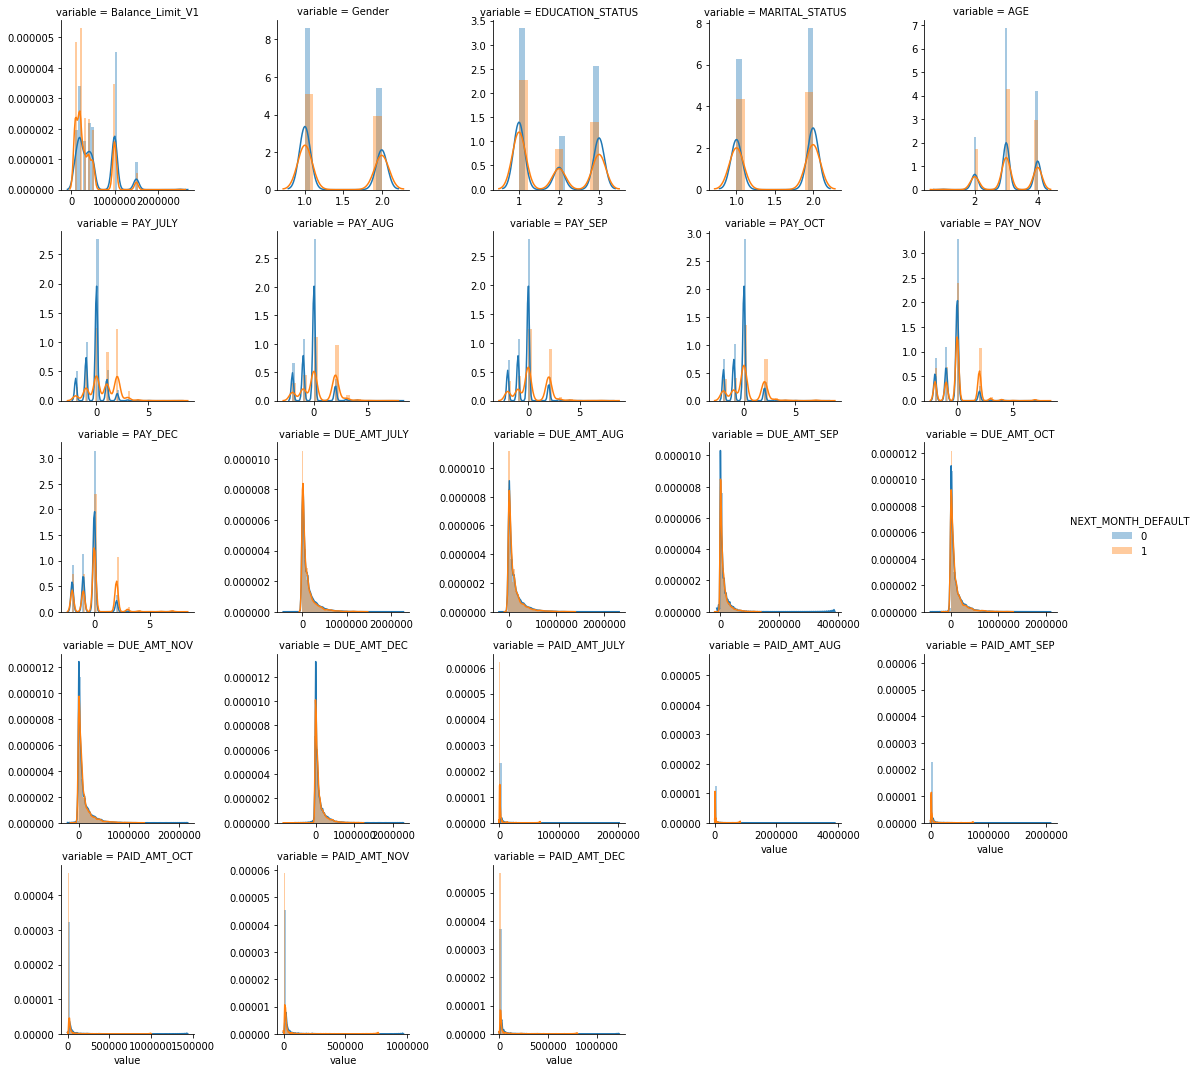

In [642]:
output = 'NEXT_MONTH_DEFAULT'

# Let's do a little EDA
cols = [ f for f in traindata.columns if traindata.dtypes[ f ] != "object"]

cols.remove( output )

f = pd.melt( traindata, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()


In [0]:
traindata['BIAS']=1
testdata['BIAS']=1

In [0]:
independentVar= ['Balance_Limit_V1',
                'Gender',
                  'EDUCATION_STATUS',
                  'MARITAL_STATUS',
                  'AGE',
                 'PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC',
                 'DUE_AMT_JULY','DUE_AMT_AUG','DUE_AMT_SEP','DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC',
                 'PAID_AMT_JULY','PAID_AMT_AUG','PAID_AMT_SEP','PAID_AMT_OCT','PAID_AMT_NOV','PAID_AMT_DEC','BIAS']

X_train, y_train,X_test =traindata[independentVar],traindata['NEXT_MONTH_DEFAULT'],testdata[independentVar]

# X_train, y_train =traindata[independentVar],traindata['NEXT_MONTH_DEFAULT']

# from sklearn.model_selection import train_test_split
# X_train,Xtest, y_train,ytest = train_test_split(X_train,y_train,test_size=0.30)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )




# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
 

# # define undersampling strategy
# under = RandomUnderSampler(sampling_strategy=0.4)
# # fit and apply the transform
# X_train_res, y_train_res = under.fit_resample(X_train, y_train)

# sm = SMOTE(random_state=2,sampling_strategy=0.5)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())





In [656]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [657]:
y_pred = classifier.predict(X_test)
# y_pred1 = classifier.predict(Xtest)
y=[]
for i in y_pred:
  y.append([i])
ydata=pd.DataFrame(y,columns=['NEXT_MONTH_DEFAULT'])
ydata['Client_ID']=testdata['Client_ID']
print (ydata.groupby(['NEXT_MONTH_DEFAULT']).count())




# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(ytest, y_pred1)
# print(confusion_matrix)

                    Client_ID
NEXT_MONTH_DEFAULT           
0                        5305
1                         695


In [0]:
# from sklearn.metrics import classification_report
# print(classification_report(ytest, y_pred1))
